In [1]:
# importing libraries
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import pandas as pd
from keras.utils.np_utils import to_categorical

/home/vajir/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vajir/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/vajir/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vajir/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [16]:
# importing data set
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [17]:
# train data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [63]:
X_train = train_data.iloc[: ,1:].values/255.0
Y_train = train_data.iloc[: ,0].values
X_test = test_data.iloc[: ,:].values/255.0
print('X_train shape =' ,X_train.shape)
print('Y_train shape =' ,Y_train.shape)
print('X_test shape =' ,X_test.shape)

X_train shape = (42000, 784)
Y_train shape = (42000,)
X_test shape = (28000, 784)


In [64]:
Y_train = to_categorical(Y_train ,num_classes =10)

In [65]:
from sklearn.cross_validation import train_test_split
X_train_std ,X_cv_std ,Y_train_std ,Y_cv_std = train_test_split(X_train ,Y_train ,test_size =0.2 ,random_state =0)
print(X_train_std.shape)
print(X_cv_std.shape)
print(Y_train_std.shape)
print(Y_cv_std.shape)

(33600, 784)
(8400, 784)
(33600, 10)
(8400, 10)


In [66]:
from keras import models
from keras import layers
from keras import optimizers
network = models.Sequential()
network.add(layers.Dense(512 ,activation= 'relu' ,input_shape =(784,)))
network.add(layers.Dropout(0.4))
network.add(layers.Dense(256 ,activation ='relu'))
network.add(layers.Dropout(0.4))
network.add(layers.Dense(64 ,activation ='relu'))
network.add(layers.Dropout(0.4))
network.add(layers.Dense(32 ,activation ='relu'))
network.add(layers.Dense(10 ,activation ='softmax'))

In [67]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_32 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_33 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 32)                2080      
__________

In [68]:
network.compile(optimizer =optimizers.RMSprop(lr =2e-5) ,loss ='categorical_crossentropy' ,metrics =['acc'])

In [69]:

history =network.fit(X_train_std ,Y_train_std ,epochs =100 ,batch_size =64 ,validation_data =(X_cv_std ,Y_cv_std) )

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 36s 1ms/step - loss: 2.2148 - acc: 0.1858 - val_loss: 1.8997 - val_acc: 0.5646
Epoch 2/100
33600/33600 [==============================] - 34s 1ms/step - loss: 1.8622 - acc: 0.3753 - val_loss: 1.3781 - val_acc: 0.6733
Epoch 3/100
33600/33600 [==============================] - 34s 1ms/step - loss: 1.4979 - acc: 0.5117 - val_loss: 0.9952 - val_acc: 0.7606
Epoch 4/100
33600/33600 [==============================] - 34s 1ms/step - loss: 1.2376 - acc: 0.6030 - val_loss: 0.7704 - val_acc: 0.8139
Epoch 5/100
33600/33600 [==============================] - 34s 997us/step - loss: 1.0532 - acc: 0.6656 - val_loss: 0.6331 - val_acc: 0.8490
Epoch 6/100
33600/33600 [==============================] - 33s 986us/step - loss: 0.9223 - acc: 0.7103 - val_loss: 0.5441 - val_acc: 0.8673
Epoch 7/100
33600/33600 [==============================] - 33s 978us/step - loss: 0.8197 - acc: 0.7462 - val_loss: 0.47

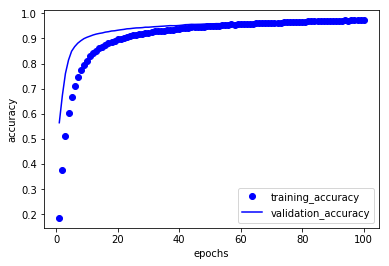

In [70]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =range(1 ,len((acc)) +1)
plt.plot(epochs ,acc ,'bo' ,label ='training_accuracy')
plt.plot(epochs ,val_acc ,'b-' ,label = 'validation_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [71]:
y_pred = network.predict(X_test)

In [72]:
Y_pred = np.argmax(y_pred ,axis =1)
print(Y_pred.shape)

(28000,)


In [73]:
data1 = pd.read_csv('sample_submission.csv')
Y1 = data1.iloc[: ,0].values
Y = {'ImageId':Y1 ,'Label':Y_pred}
df = pd.DataFrame(data =Y ,dtype =int)
df.to_csv('Data_recog_submission_5.csv' ,sep =',')